In [ ]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 55.7MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


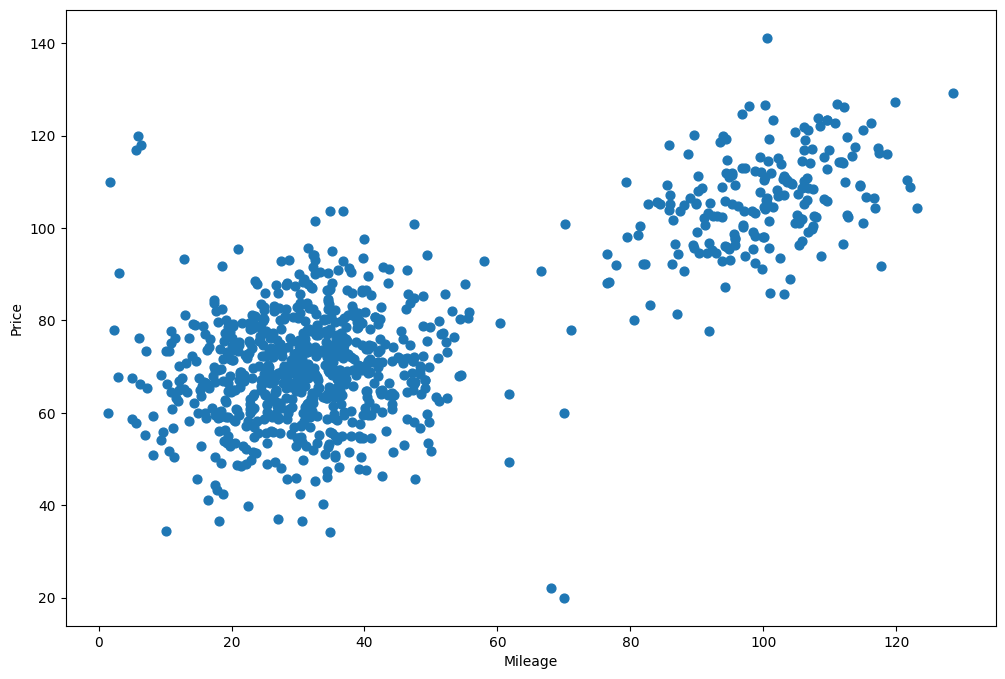

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
i_f = IsolationForest(contamination = 0.05, random_state = 42)
y_if = i_f.fit_predict(df)

df['is_outlier_if'] = y_if

In [ ]:
df.head()

,Mileage,Price,is_outlier_if
0,54.282388,67.967708,1
1,17.331911,70.023637,1
2,36.548113,68.080455,1
3,42.567541,71.058755,1
4,5.608853,57.822432,1


In [ ]:
df['is_outlier_if'].value_counts()

,count
is_outlier_if,
1,862
-1,46


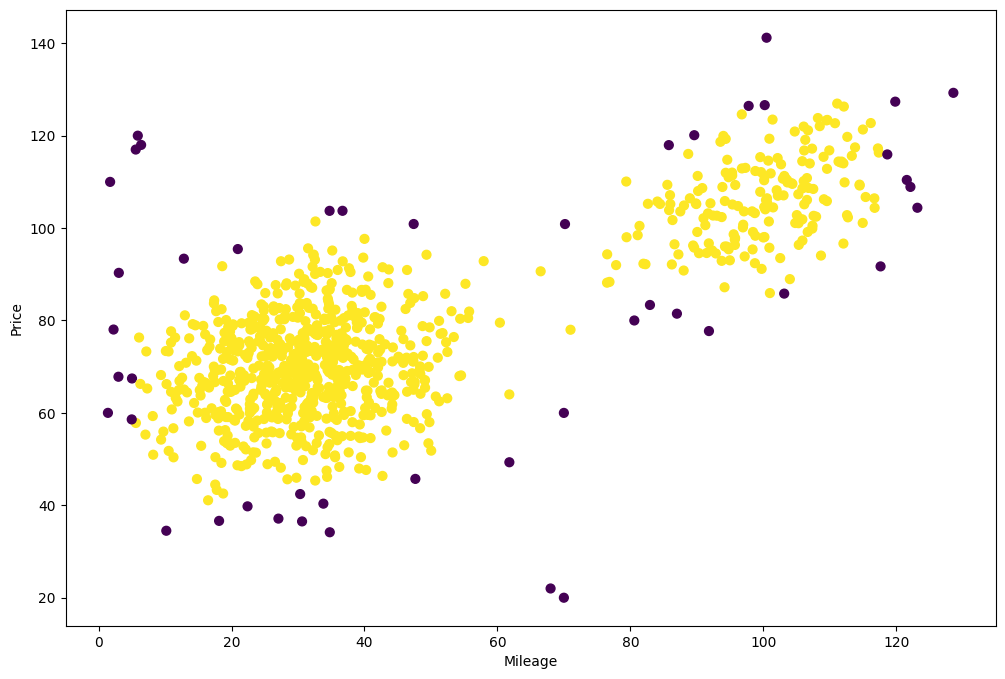

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_lof = lof.fit_predict(df)

df['is_outlier_lof'] = y_lof


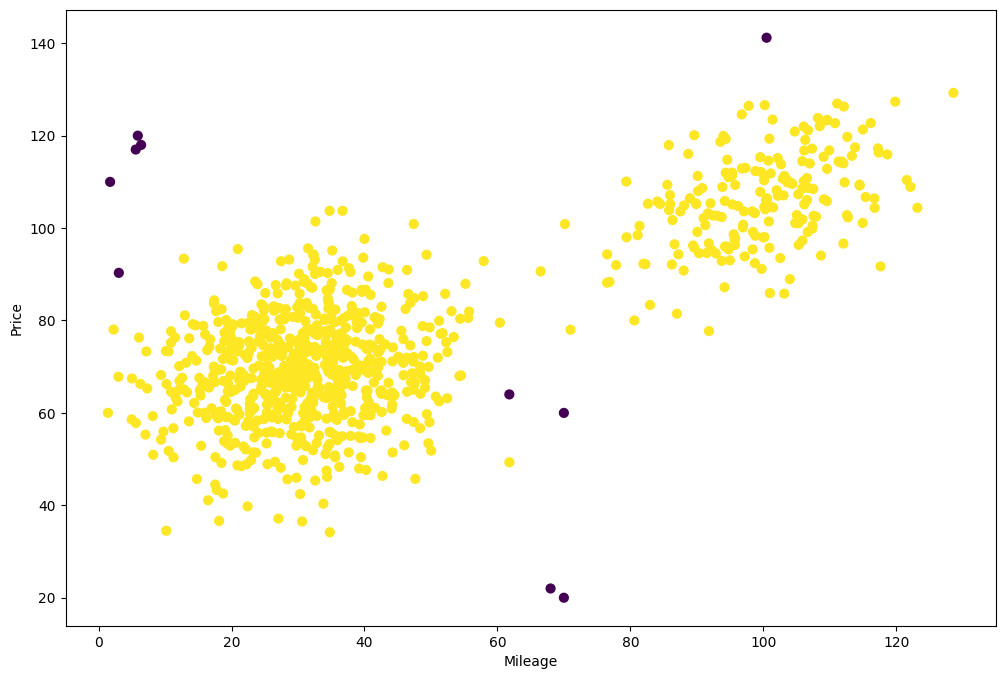

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()